In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
yf.pdr_override()

# download dataframe
df = pdr.get_data_yahoo("ABC", start="2020-10-15", end="2022-10-03", interval='60m')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-10-15 09:30:00-04:00,97.889999,100.610001,97.250000,99.059998,99.059998,247472
2020-10-15 10:30:00-04:00,99.120003,99.370003,98.620003,98.910004,98.910004,83061
2020-10-15 11:30:00-04:00,98.910004,99.099998,98.285004,98.288300,98.288300,116163
2020-10-15 12:30:00-04:00,98.330002,99.419998,98.330002,99.250000,99.250000,80904
2020-10-15 13:30:00-04:00,99.245003,99.400002,98.959999,99.292397,99.292397,124154
...,...,...,...,...,...,...
2022-09-30 11:30:00-04:00,137.279999,137.485001,136.660004,136.850006,136.850006,62823
2022-09-30 12:30:00-04:00,136.910004,137.210007,136.820007,137.154999,137.154999,68782
2022-09-30 13:30:00-04:00,137.130005,137.225006,136.139999,136.160004,136.160004,91080


In [22]:
data = df.iloc[:, 0: 1].values

data

array([[ 97.88999939],
       [ 99.12000275],
       [ 98.91000366],
       ...,
       [137.13000488],
       [136.19500732],
       [136.05000305]])

In [23]:
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)

data

array([[0.07194727],
       [0.08848847],
       [0.08566438],
       ...,
       [0.59965046],
       [0.58707653],
       [0.5851265 ]])

In [30]:
X = []
y  = []

#use the previous 60 time steps to predict the next step
for i in range(60, len(data)): # in the range from the 61st value to the end
    X.append(data[i-60: i, 0]) # load the previous 60 values into x
    y.append(data[i, 0]) # load the current value into y
    
X, y = np.array(X), np.array(y)

In [31]:
X

array([[0.07194727, 0.08848847, 0.08566438, ..., 0.09359871, 0.07934376,
        0.08364715],
       [0.08848847, 0.08566438, 0.07786446, ..., 0.07934376, 0.08364715,
        0.0934642 ],
       [0.08566438, 0.07786446, 0.09016948, ..., 0.08364715, 0.0934642 ,
        0.08821945],
       ...,
       [0.63394293, 0.62452931, 0.619957  , ..., 0.59467453, 0.60166759,
        0.59669186],
       [0.62452931, 0.619957  , 0.62533616, ..., 0.60166759, 0.59669186,
        0.59965046],
       [0.619957  , 0.62533616, 0.62547077, ..., 0.59669186, 0.59965046,
        0.58707653]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .02, random_state = 42)

In [33]:
print(X_train.shape)
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))
X_test

(3321, 60)


array([[[0.21234538],
        [0.21274881],
        [0.21651425],
        ...,
        [0.10502956],
        [0.10314684],
        [0.11034162]],

       [[0.3800431 ],
        [0.37614314],
        [0.35718128],
        ...,
        [0.37022595],
        [0.36915007],
        [0.37721891]],

       [[0.66023397],
        [0.66769777],
        [0.66030128],
        ...,
        [0.71765738],
        [0.72725938],
        [0.70683177]],

       ...,

       [[0.35099517],
        [0.35166762],
        [0.35623992],
        ...,
        [0.41366333],
        [0.41070473],
        [0.40519096]],

       [[0.34225389],
        [0.36121575],
        [0.36861214],
        ...,
        [0.32894031],
        [0.32591451],
        [0.32483864]],

       [[0.43302851],
        [0.42052178],
        [0.41810245],
        ...,
        [0.33902638],
        [0.34057288],
        [0.33808502]]])

In [34]:
rnn = keras.Sequential()

rnn.add(keras.layers.SimpleRNN(128, return_sequences=True))
rnn.add(keras.layers.SimpleRNN(128, return_sequences=True))
rnn.add(keras.layers.SimpleRNN(256, return_sequences=True))
rnn.add(keras.layers.SimpleRNN(32))
rnn.add(keras.layers.Dense(units = 1))

rnn.compile(optimizer='rmsprop', loss='mean_squared_error')
rnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
104/104 [==============================] - 6s 37ms/step - loss: 0.3446
Epoch 2/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0721
Epoch 3/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0594
Epoch 4/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0310
Epoch 5/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0164
Epoch 6/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0093
Epoch 7/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0063
Epoch 8/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0066
Epoch 9/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0050
Epoch 10/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0047
Epoch 11/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0038
Epoch 12/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0038
E

In [35]:
lstm = keras.Sequential()

lstm.add(keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm.add(keras.layers.Dropout(rate = 0.2))
lstm.add(keras.layers.LSTM(units = 50, return_sequences = True))
lstm.add(keras.layers.Dropout(rate = 0.2))
lstm.add(keras.layers.LSTM(units = 50, return_sequences = True))
lstm.add(keras.layers.Dropout(rate = 0.2))
lstm.add(keras.layers.LSTM(units = 50, return_sequences = False))
lstm.add(keras.layers.Dropout(rate = 0.2))
lstm.add(keras.layers.Dense(units = 1))

lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
104/104 [==============================] - 8s 46ms/step - loss: 0.0150
Epoch 2/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0036
Epoch 3/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0038
Epoch 4/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0029
Epoch 5/100
104/104 [==============================] - 5s 46ms/step - loss: 0.0027
Epoch 6/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0028
Epoch 7/100
104/104 [==============================] - 5s 46ms/step - loss: 0.0024
Epoch 8/100
104/104 [==============================] - 5s 46ms/step - loss: 0.0025
Epoch 9/100
104/104 [==============================] - 5s 46ms/step - loss: 0.0026
Epoch 10/100
104/104 [==============================] - 5s 46ms/step - loss: 0.0023
Epoch 11/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0024
Epoch 12/100
104/104 [==============================] - 5s 46ms/step - loss: 0.0021
E

In [36]:
gru = keras.Sequential()

gru.add(keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
gru.add(keras.layers.GRU(units=50, return_sequences=True))
gru.add(keras.layers.GRU(units=50, return_sequences=True))
gru.add(keras.layers.GRU(units=50, return_sequences=False, activation='tanh'))
gru.add(keras.layers.Dense(units=1))

history = gru.compile(optimizer='rmsprop', loss='mean_squared_error')
gru.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
104/104 [==============================] - 8s 45ms/step - loss: 0.0092
Epoch 2/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0035
Epoch 3/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0027
Epoch 4/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0022
Epoch 5/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0018
Epoch 6/100
104/104 [==============================] - 5s 44ms/step - loss: 0.0015
Epoch 7/100
104/104 [==============================] - 5s 44ms/step - loss: 0.0013
Epoch 8/100
104/104 [==============================] - 5s 44ms/step - loss: 0.0014
Epoch 9/100
104/104 [==============================] - 5s 45ms/step - loss: 0.0011
Epoch 10/100
104/104 [==============================] - 5s 44ms/step - loss: 0.0010
Epoch 11/100
104/104 [==============================] - 5s 45ms/step - loss: 9.3419e-04
Epoch 12/100
104/104 [==============================] - 5s 45ms/step - loss: 8.78

In [37]:
predicted_rnn = rnn.predict(X_test)
predicted_lstm = lstm.predict(X_test)
predicted_gru = gru.predict(X_test)

# change data back to original form
predicted_rnn = sc.inverse_transform(predicted_rnn)
predicted_lstm = sc.inverse_transform(predicted_lstm)
predicted_gru = sc.inverse_transform(predicted_gru)

3/3 [==============================] - 1s 10ms/step


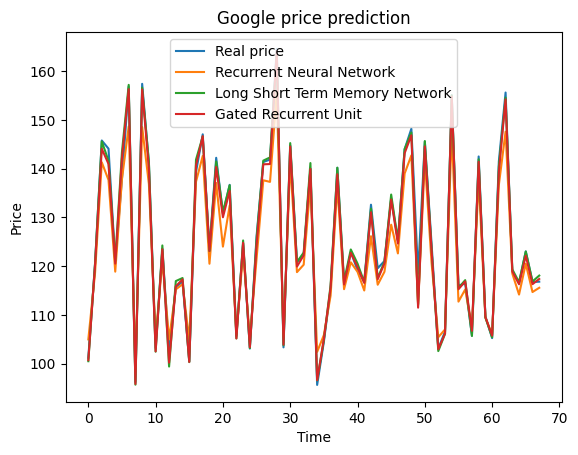

In [38]:
org = sc.inverse_transform(y_test.reshape(-1, 1))

plt.plot(org, label = 'Real price')
plt.plot(predicted_rnn, label = 'Recurrent Neural Network')
plt.plot(predicted_lstm, label = 'Long Short Term Memory Network')
plt.plot(predicted_gru, label = 'Gated Recurrent Unit')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
rmse_rnn = np.sqrt(mean_squared_error(org, predicted_rnn))
rmse_lstm = np.sqrt(mean_squared_error(org, predicted_lstm))
rmse_gru = np.sqrt(mean_squared_error(org, predicted_gru))

print ('Test RMSE - RNN: %.3f' % rmse_rnn)
print ('Test RMSE - LSTM: %.3f' % rmse_lstm)
print ('Test RMSE - GRU: %.3f' % rmse_gru)

Test RMSE - RNN: 3.992
Test RMSE - LSTM: 1.336
Test RMSE - GRU: 1.388
